# Cancer_Patient_Prediction_Model

### importing required libraries:

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

### Dataset:

In [5]:
df = pd.read_csv("cancer patient datasets.csv")
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [6]:
df.tail()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
999,P999,47,1,6,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
1000,P1000,20,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No Cancer
1001,P1001,43,2,1,2,4,2,1,2,1,...,0,0,0,1,2,1,2,1,0,No Cancer
1002,P1002,34,1,2,1,2,1,2,1,0,...,1,0,2,1,0,2,1,1,0,No Cancer
1003,P1003,43,2,1,1,1,2,1,1,2,...,1,2,1,1,2,1,2,1,0,No Cancer


# Analysing the data

In [7]:
df.shape

(1004, 25)

In [8]:
df.info

<bound method DataFrame.info of      Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0            P1   33       1              2            4             5   
1           P10   17       1              3            1             5   
2          P100   35       1              4            5             6   
3         P1000   37       1              7            7             7   
4          P101   46       1              6            8             7   
...         ...  ...     ...            ...          ...           ...   
999        P999   47       1              6            5             6   
1000      P1000   20       1              0            0             0   
1001      P1001   43       2              1            2             4   
1002      P1002   34       1              2            1             2   
1003      P1003   43       2              1            1             1   

      OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  

In [9]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,...,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,37.165339,1.402390,3.828685,4.548805,5.151394,4.825697,4.565737,4.366534,4.476096,4.451195,...,4.843625,3.842629,3.841633,4.226096,3.764940,3.735060,3.911355,3.526892,3.840637,2.914343
std,11.997032,0.490624,2.034727,2.625249,1.990753,2.116379,2.135178,1.857623,2.144907,2.132362,...,2.435703,2.250321,2.212946,2.291707,2.046938,2.273328,2.390808,1.835257,2.044496,1.483251
min,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.750000,1.000000,2.000000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.000000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [10]:
print("Keys of Cancer_dataset: \n{}".format(df.keys()))

Keys of Cancer_dataset: 
Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


In [11]:
print("Cancer_level: {}".format(df['Level']))

Cancer_level: 0             Low
1          Medium
2            High
3            High
4            High
          ...    
999          High
1000    No Cancer
1001    No Cancer
1002    No Cancer
1003    No Cancer
Name: Level, Length: 1004, dtype: object


In [12]:
print(df.Gender.unique())
print(df.Level.unique())

[1 2]
['Low' 'Medium' 'High' 'No Cancer']


Unique values: [1 2]
Value counts
 1    600
2    404
Name: Gender, dtype: int64

Gender plot:


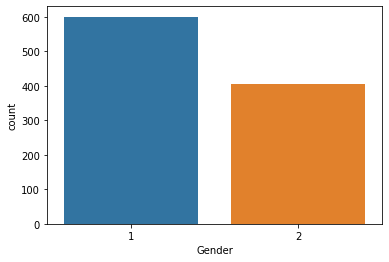

In [13]:
print('Unique values:',df['Gender'].unique())
print('Value counts\n',df['Gender'].value_counts())
print('\nGender plot:')
sns.countplot(data=df,x='Gender')

Unique values:
 [2 4 7 3 6 5 9 8 1 0]
Value counts:
 7    296
4    191
2    183
3    153
1     80
6     40
8     30
9     19
5     10
0      2
Name: Chest Pain, dtype: int64


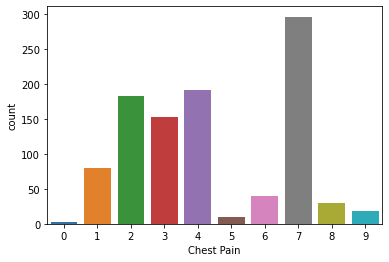

In [14]:
print('Unique values:\n',df['Chest Pain'].unique())
print('Value counts:\n',df['Chest Pain'].value_counts())
sns.countplot(data=df,x='Chest Pain')

Unique values:
 [4 3 7 2 6 5 1 8 0]
Value counts:
 2    281
7    230
3    150
1    121
5    100
4     60
6     49
8     10
0      3
Name: Weight Loss, dtype: int64


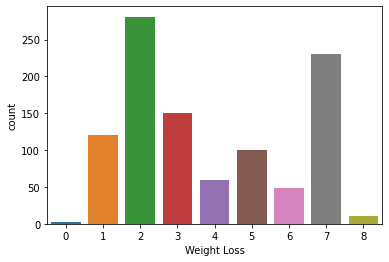

In [15]:
print('Unique values:\n',df['Weight Loss'].unique())
print('Value counts:\n',df[ 'Weight Loss'].value_counts())
sns.countplot(data=df,x= 'Weight Loss')

Unique values:
 [2 1 6 4 3 7 5 0]
Value counts:
 3    230
2    194
4    180
6    170
1    140
7     69
5     20
0      1
Name: Frequent Cold, dtype: int64


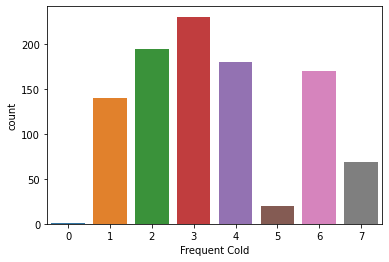

In [16]:
print('Unique values:\n',df['Frequent Cold'].unique())
print('Value counts:\n',df['Frequent Cold'].value_counts())
sns.countplot(data=df,x='Frequent Cold')

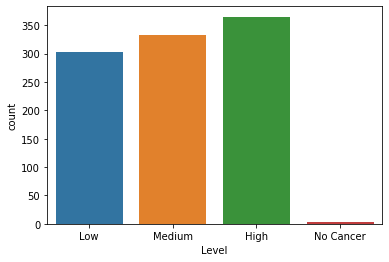

patients with low level cancer: 365 ,patients with medium level cancer: 332, patients with high level cancer:303


In [17]:
sns.countplot(x='Level',data=df)
plt.show()
Level=df.Level.value_counts()
print(f"patients with low level cancer: {Level[0]} ,patients with medium level cancer: {Level[1]}, patients with high level cancer:{Level[2]}")

In [18]:
missing_values_count = df.isnull().sum()
missing_values_count[0:26]


Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [19]:
#1-Male
#2-Female
df.Gender.value_counts()

1    600
2    404
Name: Gender, dtype: int64

In [20]:
#The values which composes diff columns
df.nunique(axis=0)

Patient Id                  1003
Age                           41
Gender                         2
Air Pollution                  9
Alcohol use                    9
Dust Allergy                   9
OccuPational Hazards           9
Genetic Risk                   8
chronic Lung Disease           8
Balanced Diet                  8
Obesity                        8
Smoking                        9
Passive Smoker                 9
Chest Pain                    10
Coughing of Blood             10
Fatigue                        9
Weight Loss                    9
Shortness of Breath            9
Wheezing                       9
Swallowing Difficulty          9
Clubbing of Finger Nails      10
Frequent Cold                  8
Dry Cough                      8
Snoring                        8
Level                          4
dtype: int64

In [21]:
# import pandas library
import pandas as pd
  
# creating file handler for
# our example.csv file in
# read mode
file_handler = open("cancer patient datasets.csv", "r")
data = pd.read_csv(file_handler, sep = ",")
  
# closing the file handler
file_handler.close()
data['Patient Id'] = data['Patient Id'].str[1:]

data.Level[data.Level == 'No Cancer'] = 0
data.Level[data.Level == 'Low'] = 1
data.Level[data.Level == 'Medium'] = 2
data.Level[data.Level == 'High'] = 3
print(data)


     Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0             1   33       1              2            4             5   
1            10   17       1              3            1             5   
2           100   35       1              4            5             6   
3          1000   37       1              7            7             7   
4           101   46       1              6            8             7   
...         ...  ...     ...            ...          ...           ...   
999         999   47       1              6            5             6   
1000       1000   20       1              0            0             0   
1001       1001   43       2              1            2             4   
1002       1002   34       1              2            1             2   
1003       1003   43       2              1            1             1   

      OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                        4    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/i

In [22]:
data=data.astype({"Patient Id": "int","Level" : "int"})
data.dtypes

Patient Id                  int64
Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
Level                       int64
dtype: object

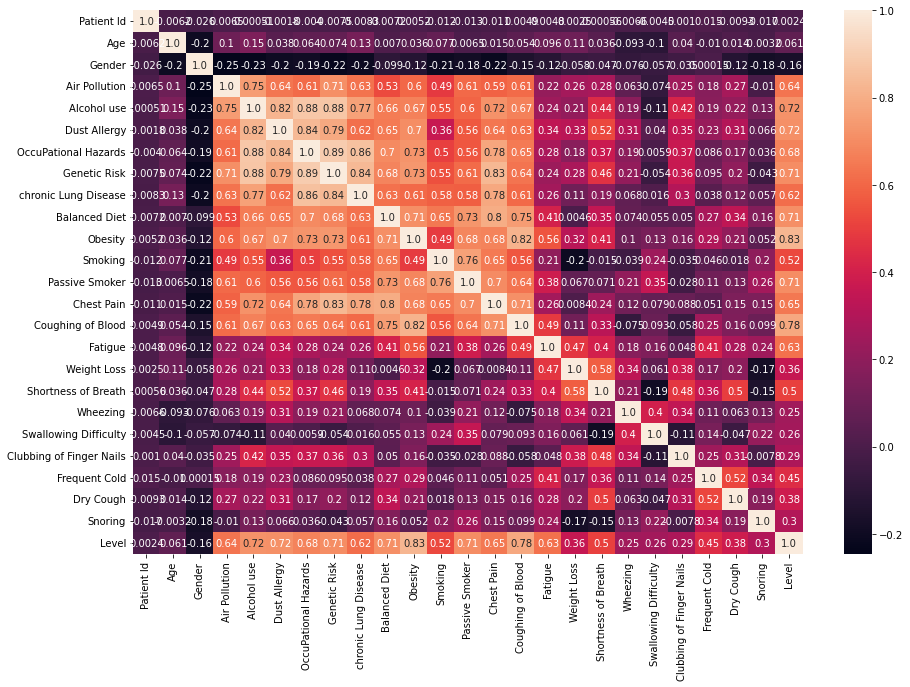

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.2')

In [24]:
a = data.corr()
a
#Age and PatientID have 0 correlation.

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
Patient Id,1.000000,-0.006164,-0.025891,0.006547,0.000510,-0.001795,-0.003964,-0.007515,-0.008293,-0.007198,...,0.004788,0.002462,0.000560,-0.006579,-0.004510,0.001003,0.015381,-0.009293,-0.016918,0.002446
Age,-0.006164,1.000000,-0.198824,0.100533,0.152673,0.037732,0.064160,0.074383,0.130237,0.007012,...,0.095838,0.107978,0.036425,-0.093134,-0.103309,0.040451,-0.010345,0.013757,-0.003237,0.061021
Gender,-0.025891,-0.198824,1.000000,-0.246473,-0.226583,-0.202281,-0.190676,-0.222285,-0.203560,-0.098856,...,-0.116873,-0.057870,-0.047300,-0.076478,-0.057177,-0.035008,0.000150,-0.122869,-0.181387,-0.164555
Air Pollution,0.006547,0.100533,-0.246473,1.000000,0.749090,0.640456,0.612391,0.708039,0.630173,0.529057,...,0.218384,0.264104,0.276009,0.063333,-0.073622,0.246504,0.180386,0.267848,-0.010153,0.639366
Alcohol use,0.000510,0.152673,-0.226583,0.749090,1.000000,0.819852,0.879654,0.877999,0.765645,0.656303,...,0.243311,0.214221,0.440217,0.187486,-0.106419,0.418859,0.186589,0.217856,0.131913,0.720502
Dust Allergy,-0.001795,0.037732,-0.202281,0.640456,0.819852,1.000000,0.837349,0.789754,0.624477,0.650658,...,0.338711,0.327945,0.522876,0.311885,0.039714,0.350974,0.226473,0.307480,0.065511,0.717044
OccuPational Hazards,-0.003964,0.064160,-0.190676,0.612391,0.879654,0.837349,1.000000,0.894008,0.859992,0.695207,...,0.275175,0.184841,0.372804,0.187307,0.005934,0.371522,0.085531,0.168693,0.035893,0.677675
Genetic Risk,-0.007515,0.074383,-0.222285,0.708039,0.877999,0.789754,0.894008,1.000000,0.838008,0.683266,...,0.238292,0.278940,0.463862,0.212952,-0.054331,0.363146,0.094832,0.202701,-0.042923,0.705162
chronic Lung Disease,-0.008293,0.130237,-0.203560,0.630173,0.765645,0.624477,0.859992,0.838008,1.000000,0.627267,...,0.255656,0.113816,0.191292,0.067518,0.016408,0.304099,0.038048,0.124077,0.056999,0.616274
Balanced Diet,-0.007198,0.007012,-0.098856,0.529057,0.656303,0.650658,0.695207,0.683266,0.627267,1.000000,...,0.406763,0.004558,0.350272,0.073657,0.055338,0.050039,0.270535,0.339026,0.164195,0.710335


In [25]:
cancer_features=['Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring']

In [26]:
y=data.Level

In [27]:
y.describe()

count    1004.000000
mean        2.053785
std         0.824050
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Level, dtype: float64

In [28]:
X = data[cancer_features]

In [29]:
X.describe()

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,...,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,3.828685,4.548805,5.151394,4.825697,4.565737,4.366534,4.476096,4.451195,3.935259,4.181275,...,4.843625,3.842629,3.841633,4.226096,3.764940,3.735060,3.911355,3.526892,3.840637,2.914343
std,2.034727,2.625249,1.990753,2.116379,2.135178,1.857623,2.144907,2.132362,2.499610,2.317519,...,2.435703,2.250321,2.212946,2.291707,2.046938,2.273328,2.390808,1.835257,2.044496,1.483251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [30]:
X.head(1000)

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,2,4,5,4,3,2,2,4,3,2,...,4,3,4,2,2,3,1,2,3,4
1,3,1,5,3,4,2,2,2,2,4,...,3,1,3,7,8,6,2,1,7,2
2,4,5,6,5,5,4,6,7,2,3,...,8,8,7,9,2,1,4,6,7,2
3,7,7,7,7,6,7,7,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,6,8,7,7,7,6,7,7,8,7,...,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,7,7,7,7,6,7,7,7,8,...,7,5,3,2,7,8,2,4,5,3
996,6,8,7,7,7,6,7,7,7,8,...,7,9,6,5,7,2,4,3,1,4
997,4,5,6,5,5,4,6,7,2,3,...,8,8,7,9,2,1,4,6,7,2
998,6,8,7,7,7,6,7,7,8,7,...,9,3,2,4,1,4,2,4,2,3


In [31]:
y.head()

0    1
1    2
2    3
3    3
4    3
Name: Level, dtype: int64

Model Selection

In [32]:
X_train=X.values
y_train=y
X_train.shape, y_train.shape

from sklearn.model_selection import train_test_split, GridSearchCV
X_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=101)

In [33]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (702, 21)
y_train shape: (702,)


In [34]:
print("X_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (302, 21)
y_test shape: (302,)


Decision Tree Classification

In [35]:
model = DecisionTreeClassifier()

In [36]:
tree = model.fit(X_train,y_train)

In [37]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [38]:
y_pred = tree.predict(x_test)
print("Test set predictions:\n {}".format(y_pred))


Test set predictions:
 [1 3 3 3 2 2 2 2 3 1 3 3 2 3 2 3 3 3 2 2 3 2 1 3 1 1 3 1 2 2 1 2 2 3 2 3 1
 2 2 3 3 2 2 3 1 3 2 1 3 3 2 1 3 1 1 1 1 3 2 2 3 2 1 3 2 3 2 3 3 3 2 2 1 1
 1 3 2 2 1 1 1 2 2 1 1 2 1 2 2 2 1 2 2 0 1 2 2 2 2 2 1 3 2 2 3 1 3 1 3 2 1
 1 3 2 1 3 1 2 3 3 2 2 2 2 2 2 3 3 1 2 3 3 2 1 3 3 3 2 3 2 3 1 2 1 3 1 1 3
 2 1 2 2 1 3 2 1 2 2 3 1 2 3 3 3 2 1 1 1 3 3 2 1 2 3 1 2 3 2 3 3 1 3 2 3 2
 3 3 3 3 2 3 3 1 1 2 2 1 3 1 3 2 2 3 3 1 2 3 2 1 2 2 1 2 1 2 1 1 2 1 2 1 3
 3 1 3 1 2 3 1 1 1 2 2 2 2 3 1 1 1 1 2 2 1 3 2 1 1 1 1 3 1 2 3 3 2 1 2 2 1
 2 2 1 1 3 3 1 1 2 2 3 2 1 2 2 2 1 2 3 3 2 2 2 2 3 3 1 1 3 2 3 3 2 1 1 2 3
 2 2 2 2 1 3]


In [39]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 1.00


In [40]:
print("Test set score: {:.2f}".format(tree.score(x_test, y_test)))


Test set score: 1.00


XGBClassification

In [41]:
from xgboost import XGBClassifier

model1 = XGBClassifier()
xgb = model1.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(xgb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(xgb.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.997


In [42]:
y_pred1 = xgb.predict(x_test)
print("Test set predictions:\n {}".format(y_pred1))


Test set predictions:
 [1 3 3 3 2 2 2 2 3 1 3 3 2 3 2 3 3 3 2 2 3 2 1 3 1 1 3 1 2 2 1 2 2 3 2 3 1
 2 2 3 3 2 2 3 1 3 2 1 3 3 2 1 3 1 1 1 1 3 2 2 3 2 1 3 2 3 2 3 3 3 2 2 1 1
 1 3 2 2 1 1 1 2 2 1 1 2 1 2 2 2 1 2 2 1 1 2 2 2 2 2 1 3 2 2 3 1 3 1 3 2 1
 1 3 2 1 3 1 2 3 3 2 2 2 2 2 2 3 3 1 2 3 3 2 1 3 3 3 2 3 2 3 1 2 1 3 1 1 3
 2 1 2 2 1 3 2 1 2 2 3 1 2 3 3 3 2 1 1 1 3 3 2 1 2 3 1 2 3 2 3 3 1 3 2 3 2
 3 3 3 3 2 3 3 1 1 2 2 1 3 1 3 2 2 3 3 1 2 3 2 1 2 2 1 2 1 2 1 1 2 1 2 1 3
 3 1 3 1 2 3 1 1 1 2 2 2 2 3 1 1 1 1 2 2 1 3 2 1 1 1 1 3 1 2 3 3 2 1 2 2 1
 2 2 1 1 3 3 1 1 2 2 3 2 1 2 2 2 1 2 3 3 2 2 2 2 3 3 1 1 3 2 3 3 2 1 1 2 3
 2 2 2 2 1 3]


In [43]:
print("Test set score: {:.2f}".format(np.mean(y_pred1 == y_test)))

Test set score: 1.00


In [59]:
print("Test set score: {:.2f}".format(xgb.score(x_test,y_test)))

Test set score: 1.00


KNeighbors Classification

In [63]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
knn =model2.fit(X_train, y_train)
knn.score(x_test, y_test)
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(x_test, y_test)))

Accuracy on training set: 0.997
Accuracy on test set: 1.000


In [56]:
y_pred2 = knn.predict(x_test)
print("Test set predictions:\n {}".format(y_pred2))

Test set predictions:
 [1 3 3 3 2 2 2 2 3 1 3 3 2 3 2 3 3 3 2 2 3 2 1 3 1 1 3 1 2 2 1 2 2 3 2 3 1
 2 2 3 3 2 2 3 1 3 2 1 3 3 2 1 3 1 1 1 1 3 2 2 3 2 1 3 2 3 2 3 3 3 2 2 1 1
 1 3 2 2 1 1 1 2 2 1 1 2 1 2 2 2 1 2 2 0 1 2 2 2 2 2 1 3 2 2 3 1 3 1 3 2 1
 1 3 2 1 3 1 2 3 3 2 2 2 2 2 2 3 3 1 2 3 3 2 1 3 3 3 2 3 2 3 1 2 1 3 1 1 3
 2 1 2 2 1 3 2 1 2 2 3 1 2 3 3 3 2 1 1 1 3 3 2 1 2 3 1 2 3 2 3 3 1 3 2 3 2
 3 3 3 3 2 3 3 1 1 2 2 1 3 1 3 2 2 3 3 1 2 3 2 1 2 2 1 2 1 2 1 1 2 1 2 1 3
 3 1 3 1 2 3 1 1 1 2 2 2 2 3 1 1 1 1 2 2 1 3 2 1 1 1 1 3 1 2 3 3 2 1 2 2 1
 2 2 1 1 3 3 1 1 2 2 3 2 1 2 2 2 1 2 3 3 2 2 2 2 3 3 1 1 3 2 3 3 2 1 1 2 3
 2 2 2 2 1 3]


In [57]:
print("Test set score: {:.2f}".format(np.mean(y_pred2 == y_test)))

Test set score: 1.00


In [60]:
print("Test set score: {:.2f}".format(knn.score(x_test,y_test)))

Test set score: 1.00


In [48]:
features = np.array([[6,7,7,7,7,7,6,7,7,7,7,7,8,5,7,6,7,8,7,6,2]])
features

array([[6, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 8, 5, 7, 6, 7, 8, 7, 6, 2]])

In [49]:
predictions= tree.predict(features)
y_pred = tree.predict(features)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [3]


In [50]:
y_pred1 = xgb.predict(features)
print("Test set predictions:\n {}".format(y_pred1))

Test set predictions:
 [3]


In [62]:
y_pred2 = knn.predict(features)
print("Test set predictions:\n {}".format(y_pred2))

Test set predictions:
 [3]


In [52]:

print("Enter the values of features:\n"'Air Pollution\n', 'Alcohol use\n',
       'Dust Allergy\n', 'OccuPational Hazards\n', 'Genetic Risk\n',
       'chronic Lung Disease\n', 'Balanced Diet\n', 'Obesity\n', 'Smoking\n',
       'Passive Smoker\n', 'Chest Pain\n', 'Coughing of Blood\n', 'Fatigue\n',
       'Weight Loss\n', 'Shortness of Breath\n', 'Wheezing\n',
       'Swallowing Difficulty\n', 'Clubbing of Finger Nails\n', 'Frequent Cold\n',
       'Dry Cough\n', 'Snoring\n')
features = [[int(x) for x in input().split(',')]]
print("the features are: ", features)
count = 0
b= len(features)
for i in range(1,b):
  if features[i] >=0 and features[i] <= 9:
    count += 1  
if len(features)-1 == count:
  print("the input is correct")
else:
  print("the input in not valid")

Enter the values of features:
Air Pollution
 Alcohol use
 Dust Allergy
 OccuPational Hazards
 Genetic Risk
 chronic Lung Disease
 Balanced Diet
 Obesity
 Smoking
 Passive Smoker
 Chest Pain
 Coughing of Blood
 Fatigue
 Weight Loss
 Shortness of Breath
 Wheezing
 Swallowing Difficulty
 Clubbing of Finger Nails
 Frequent Cold
 Dry Cough
 Snoring

6, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 8, 5, 7, 6, 7, 8, 7, 6, 2
the features are:  [[6, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 8, 5, 7, 6, 7, 8, 7, 6, 2]]
the input is correct


In [53]:
a = []
b = []
for num in features:
  for j in num:
    a.append(j)
    if j >= 0:
      b.append(j)
if (len(a)) == len(b):
  y_pred = knn.predict(features)
  print("Test set predictions: {}".format(y_pred))
  if y_pred == [1]:
    print("low chances of cancer")
  elif y_pred == [2]:
    print("medium chances of cancer")
  elif y_pred ==[3]:
    print("high chances of cancer")
  elif y_pred == [0]:
    print("No chances of cancer")     
    
else:
  print("invalid input")


Test set predictions: [3]
high chances of cancer
